In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Training과 Test Set으로 분리

In [3]:
train_input = fruits.loc[:34,['length','weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [5]:
train_target = fruits.loc[:34, 'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

### test

In [6]:
test_input = fruits.loc[35:,['length','weight']]
test_input.tail()

,length,weight
44,12.2,12.2
45,12.4,13.4
46,13.0,12.2
47,14.3,19.7
48,15.0,19.9


In [7]:
test_target = fruits.loc[35:,['name']]
test_target.head()

,name
35,berry
36,berry
37,berry
38,berry
39,berry


In [9]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kn = KNeighborsClassifier()

In [11]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [12]:
kn.score(test_input, test_target)

0.0

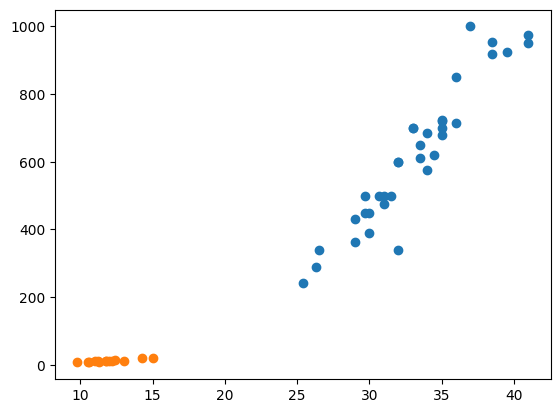

In [21]:
plt.scatter(
    train_input['length'],
    train_input['weight']
)
plt.scatter(
    test_input['length'],
    test_input['weight']
)

plt.show()


> Sampling 편향이 발생하였다
> train은 apple로만, test는 berry로만 이루어져있으므로

### Numpy를 이용하여 샘플링 편향 제거하기

In [22]:
import numpy as np

> 주의: 난수와 섞는 것은 다름

In [24]:
np.random.seed(42)
index = np.arange(49)
print(index)
np.random.shuffle(index)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [25]:
# 셔플 결과 (training data로 사용될)
index[:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [26]:
train_input = fruits.loc[list(index[:35]),['length','weight']]
train_input

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0
27,36.0,714.0
26,35.0,720.0
25,35.0,725.0
31,38.5,955.0
19,33.5,650.0


In [27]:
train_target = fruits.loc[list(index[:35]),'name']
train_target.head()

13    apple
45    berry
47    berry
44    berry
17    apple
Name: name, dtype: object

In [28]:
len(train_input) == len(train_target)

True

In [29]:
# Test
test_input = fruits.loc[list(index[35:]),['length','weight']]
test_input

,length,weight
37,10.6,7.0
35,9.8,6.7
23,35.0,680.0
39,11.2,9.8
10,31.0,475.0
22,34.5,620.0
18,33.5,610.0
48,15.0,19.9
20,34.0,575.0
7,30.0,390.0


In [30]:
test_target = fruits.loc[list(index[35:]),['length','weight']]
test_target.head()

,length,weight
37,10.6,7.0
35,9.8,6.7
23,35.0,680.0
39,11.2,9.8
10,31.0,475.0


In [31]:
len(train_input) == len(train_target)

True

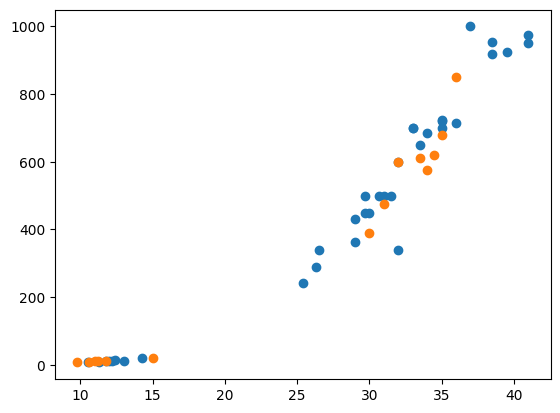

In [36]:
plt.scatter(train_input.length,train_input.weight)
plt.scatter(test_input.length,test_input.weight)
plt.show()

In [37]:
kn.fit(train_input,train_target)
kn.score(train_input,train_target)

1.0

---
### scikit-learn을 이용

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
train_input, test_input, train_target, test_target = \
    train_test_split(fruits[['length','weight']],fruits['name'],random_state=42)

print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [41]:
# 빈도수 세기
import collections

In [42]:
collections.Counter(test_target)

Counter({'apple': 10, 'berry': 3})

In [45]:
# apple과 berry의 비율 따져보기
print(len(fruits[fruits['name']=='apple']))
print(len(fruits[fruits['name']=='berry']))
print(len(fruits[fruits['name']=='apple'])/len(fruits[fruits['name']=='berry']))
# 2.5배 차이남

35
14
2.5


> apple과 berry의 비율이 비슷하게 할 필요가 있다. <- Sampling의 기본    
> ***stratify

In [49]:
train_input, test_input, train_target, test_target = \
    train_test_split(fruits[['length','weight']],fruits['name'],random_state=42, stratify=fruits['name'])

In [50]:
collections.Counter(test_target)

Counter({'apple': 9, 'berry': 4})

In [51]:
9/4
# 2.5 -> 2.25배로 완화됨

2.25

In [53]:
kn.fit(train_input,train_target)
kn.score(train_input,train_target)

1.0

In [54]:
kn.fit(test_input,test_target)
kn.score(test_input,test_target)

1.0